## Importation des modules et des données 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
acte = pd.read_csv("acte.csv", sep = ";")
ccam = pd.read_csv("ccam.csv",sep = ";")
h = pd.read_csv("h.csv",sep = ";")

## Analyse des données 

### h : durées et description des opérations par les chirurgiens

In [4]:
h.head(5)

,i,d,specialite,sous_specialite,acte_prevu
0,1,4020,URO,1.HAUT APPAREIL,CHGJJURO - JJ CHANGEMENT
1,2,3840,URO,1.HAUT APPAREIL,CHGJJURO - JJ CHANGEMENT
2,3,3840,URO,1.HAUT APPAREIL,UPRURO - UPR
3,4,3660,URO,1.HAUT APPAREIL,CHGJJURO - JJ CHANGEMENT
4,5,2400,URO,1.HAUT APPAREIL,CHGJJURO - JJ CHANGEMENT


- i : identifiant de de l'acte
- d : durée de l'acte
- specialite, sous_specialite et acte_prevu : classification des chirurgiens

In [5]:
h.isnull().sum()

i                  0
d                  0
specialite         0
sous_specialite    0
acte_prevu         0
dtype: int64

***aucune donnée nulle***

In [6]:
h["d"].describe()

count     2261.000000
mean      7598.345865
std       6277.056262
min        480.000000
25%       3540.000000
50%       5280.000000
75%       8760.000000
max      39300.000000
Name: d, dtype: float64

***on a 2261 opérations  
durée moyenne de 7598 s***

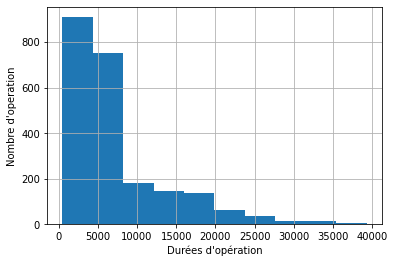

In [7]:
h["d"].plot.hist()
plt.grid(True)
plt.xlabel("Durées d'opération")
plt.ylabel("Nombre d'operation");

### Analyse des classes faites par les chirurgiens

In [41]:
g = h.groupby(["specialite",'sous_specialite']).agg(écart_type = ("d", "std"), 
                                 compteur = ("d", "count"),
                                 moyenne = ("d","mean"),
                                 minimum = ('d','min'),
                                 maximum = ('d','max'))
g

écart_type  compteur       moyenne  minimum  maximum
specialite sous_specialite                                                       
URO        1.HAUT APPAREIL  5814.144153      1390   7030.791367      480    34800
           2.BAS APPAREIL   7175.477394       448   7871.250000     1560    39300
           3.APP.GENITAL M  6443.656816       327   9365.504587     1920    36600
           4.APP.GENITAL.F          NaN         1   5220.000000     5220     5220
           5.DRAIN/PAROI    2754.397476        11   8656.363636     5040    13320
           6.I.RENALE CHRO  1751.398402        11   6578.181818     3120     9300
           7.APP.CIRCUL.    6492.857614         3  16280.000000    10260    23160
           8.DIVERS         7156.626135        70   8522.571429     1080    36300

Les chirurgiens ont divisés les actes en 8 classes distinctes. 
On peut remarquer que :
- les classes ne sont pas équilibrée.
- la classe 1 Haut appareil est majoritaire
- les durées ne sont pas homogène écart type d'environ 2h
- les classes 4 et 7 sont sous représenté avec moins de 3 observations

In [11]:
spe = list(h["sous_specialite"].unique())
spe_s = sorted(spe)
spe_s

['1.HAUT APPAREIL',
 '2.BAS APPAREIL',
 '3.APP.GENITAL M',
 '4.APP.GENITAL.F',
 '5.DRAIN/PAROI',
 '6.I.RENALE CHRO',
 '7.APP.CIRCUL.',
 '8.DIVERS']

### Histogramme de chaque classe

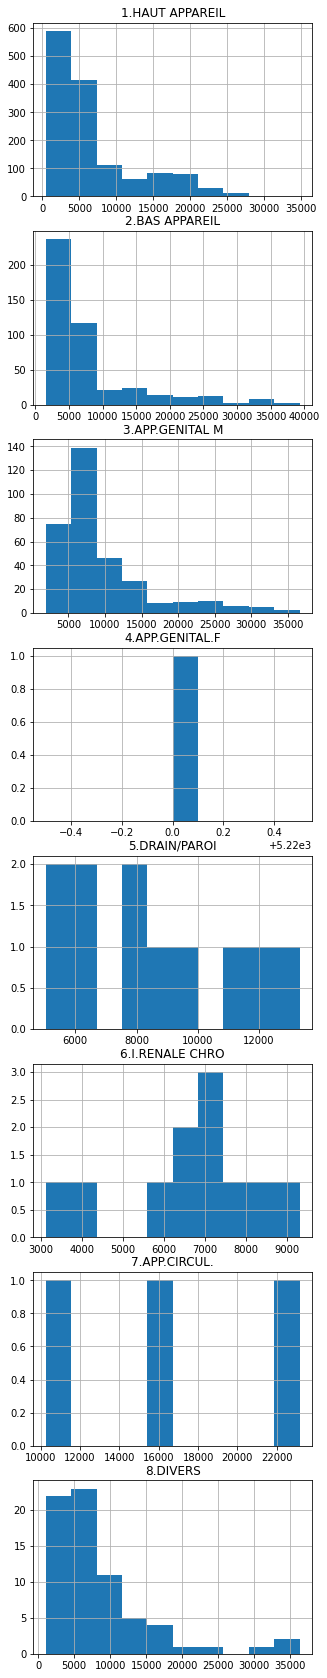

In [47]:
i = 0
fig, ax = plt.subplots(nrows=8, ncols=1,figsize=(5, 30))

for sp in spe_s:
    f = h[h["sous_specialite"]==sp]
    ax[i].hist(f['d'])
    ax[i].set_title(sp)
    ax[i].grid()
    i+=1

### Boites à moustaches

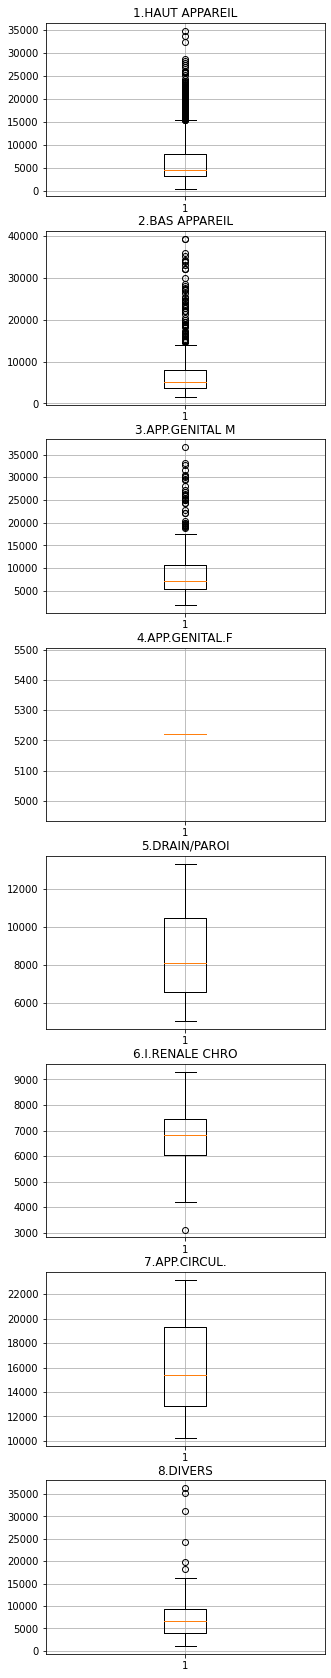

In [19]:
i = 0
fig, ax = plt.subplots(nrows=8, ncols=1,figsize=(5, 30),sharey='row')
for sp in spe_s:
    f = h[h["sous_specialite"]==sp]
    ax[i].boxplot(f['d'])
    ax[i].set_title(sp)
    ax[i].grid()
    i+=1

### Classification des chirurgiens

Attribuons à chaque classe leur durée moyenne comme prédiction

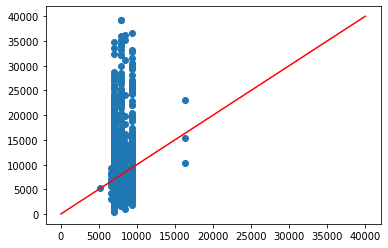

In [45]:
r = h.merge(g,left_on='sous_specialite', right_on='sous_specialite')
p = r['moyenne'] # prédiction
y = r['d'] # Vrai
plt.scatter(p,y)
plt.plot([50,40000],[50,40000],"-r")
plt.show()

### Analyses des sous classes ( acte prévu)

In [20]:
h.groupby(['sous_specialite',"acte_prevu"]).agg(écart_type = ("d", "std"), 
                                 compteur = ("d", "count"),
                                 moyenne = ("d","mean"),
                                 minimum = ('d','min'),
                                 maximum = ('d','max'))

écart_type  compteur       moyenne  minimum  maximum
sous_specialite acte_prevu                                                                                              
1.HAUT APPAREIL ABLJJURO - JJ ABLATION                                     NaN         1   3240.000000     3240     3240
                BINEPHRRURO - BINEPHRECTOMIE ROBOT                         NaN         1  17040.000000    17040    17040
                CHGJJURO - JJ CHANGEMENT                           1429.048709       312   3761.923077     1020    11700
                CHGNPCURO - CHANGEMENT NPC                         1215.050483        75   2933.600000      480     7860
                CONVNPCURO - CONVERS NPC                           1635.821434        17   5636.470588     2100     8220
                DILURETEROURO - DILATATION URETEROSCOPIE                   NaN         1   5100.000000     5100     5100
                GREFFEREINURO - GREFFE REIN                        3054.467600        89  17031.235955    11760    26040
                INJECREFLUXURO - INJECTION DEFLUX                  1060.660172         2   3750.000000     3000     4500
                JPUCOELIOURO - JPU COELIO                          2963.290790        13  19333.846154    14280    26100
                LECURO - LEC                                       1524.620796        15   4224.000000     2460     7980
                MONOJBUURO - CHGT MONOJBRICKER                     2023.893388        81   3012.592593      900    13260
                NEPHCOELURO - NEPHRECTOMIE TOTALE COELIO           4201.797235         9  17593.333333    10980    23100
                NEPHPALURO - NEPHRECTOMIE PARTIELLE LOMBOSCOPIE    2078.893937         2  18270.000000    16800    19740
                NEPHPCURO - NEPHRECTOMIE PARTIELLE COELIO          3767.280186         3  18040.000000    13740    20760
                NEPHPSCURO - NEPHRECTOMIE PARTIELLE SOUS COSTALE   4921.463197         2  15060.000000    11580    18540
                NEPHRECCOELURO - NEPHRECT-URETERCT COELIO          4966.970908         5  19920.000000    11340    23100
                NEPHRPRURO - NEPHRECTOMIE PARTIELLE ROBOT          3292.461138        42  18298.571429    12120    28680
                NEPHRTRURO - NEPHRECTOMIE TOTALE ROBOT             4169.758197        34  19778.823529    13140    32460
                NEPHTSCURO - NEPHRECTOMIE TOTALE SOUS COSTALE      5821.057160        26  18032.307692    11700    34800
                NLCPURO - NLPC                                     3852.841579        18  11210.000000     2640    17700
                NTE/VCIURO - NEPHRECTOMIE +VCI                     6342.779922         7  22242.857143    13620    33660
                POSEJJ - JJ POSE                                   1916.152867       378   4530.317460      900    12660
                POSESONDEUREURO - POSE SONDE URETERALE             1649.727250         3   5160.000000     3720     6960
                REIMPLAPURO - REIMPLANTATION UV LAPARO                     NaN         1  23280.000000    23280    23280
                REPURETERRTUURO - REPERM URETER RTU                        NaN         1  10920.000000    10920    10920
                RESECTURO - URETERECT SEGMENTAIRE                          NaN         1   8640.000000     8640     8640
                TRANSPLANTECTOURO - TRANSPLANTECTOMIE              3098.535634        14  12480.000000     7920    18840
                UPRNPCURO - UPR NPC                                3578.660563        21   6022.857143     1680    18300
                UPRURO - UPR                                       1739.482682         2   5070.000000     3840     6300
                URETEREC/REIMPLANTURO - URETERECT +REIMPLANT       1018.233765         2  17700.000000    16980    18420
                URETEROLAPURO - URETEROLYSE LAPARO                         NaN         1  28200.000000    28200    28200
                URETEROSCOPURO - URETEROSCOPIE SOUPLE              2036.389

In [24]:
print("il y a en tout " + str(len(h["acte_prevu"].unique()))+ " sous classes")

il y a en tout 115 sous classes


## acte : code ccam des opérations

In [11]:
acte.head(5)

,i,ccam_code
0,1,JCGE004
1,1,JCKE002
2,2,JCKE002
3,3,JBQH002
4,3,JDQE003


***on voit déjà qu'il plusieurs codes ccam pour une meme opération***

In [12]:
len(acte)

3922

***3922 actes alors que 2261 opérations***

In [13]:
acte.isnull().sum()

i             0
ccam_code    58
dtype: int64

***58 actes n'ont pas de code CCAM***

In [14]:
acte["ccam_code"].describe()

count        3864
unique        276
top       YYYY405
freq          540
Name: ccam_code, dtype: object

***276 codes CCAM différents, le plus fréquent est YYYY405 avec 540 occurences***

### ccam : description de la classification ccam

In [16]:
ccam.head(5)

,chapitre,chapitre_lib,sous_chapitre,sous_chapitre_lib,paragraphe,paragraphe_lib,sous_paragraphe\n,sous_paragraphe_lib,ccam_code,ccam_lib
0,1.0,"SYSTÈME NERVEUX CENTRAL, PÉRIPHÉRIQUE ET AUTONOME",1.01,ACTES DIAGNOSTIQUES SUR LE SYSTÈME NERVEUX,01.01.01,Explorations électrophysiologiques du système ...,01.01.01.01,Électromyographie [EMG],AHQB001,"Électromyographie, au lit du malade"
1,1.0,"SYSTÈME NERVEUX CENTRAL, PÉRIPHÉRIQUE ET AUTONOME",1.01,ACTES DIAGNOSTIQUES SUR LE SYSTÈME NERVEUX,01.01.01,Explorations électrophysiologiques du système ...,01.01.01.01,Électromyographie [EMG],AHQB006,"Macroélectromyographie, par électrode aiguille"
2,1.0,"SYSTÈME NERVEUX CENTRAL, PÉRIPHÉRIQUE ET AUTONOME",1.01,ACTES DIAGNOSTIQUES SUR LE SYSTÈME NERVEUX,01.01.01,Explorations électrophysiologiques du système ...,01.01.01.01,Électromyographie [EMG],AHQB013,Électromyographie de 7 muscles striés ou plus ...
3,1.0,"SYSTÈME NERVEUX CENTRAL, PÉRIPHÉRIQUE ET AUTONOME",1.01,ACTES DIAGNOSTIQUES SUR LE SYSTÈME NERVEUX,01.01.01,Explorations électrophysiologiques du système ...,01.01.01.01,Électromyographie [EMG],AHQB015,"Électromyographie de fibre unique, par électro..."
4,1.0,"SYSTÈME NERVEUX CENTRAL, PÉRIPHÉRIQUE ET AUTONOME",1.01,ACTES DIAGNOSTIQUES SUR LE SYSTÈME NERVEUX,01.01.01,Explorations électrophysiologiques du système ...,01.01.01.01,Électromyographie [EMG],AHQB024,Électromyographie de 3 à 6 muscles striés au r...


In [17]:
ccam.isnull().sum()

chapitre               1164
chapitre_lib           1164
sous_chapitre          1164
sous_chapitre_lib      1164
paragraphe             1224
paragraphe_lib         1224
sous_paragraphe\n      3501
sous_paragraphe_lib    3501
ccam_code                 0
ccam_lib                  0
dtype: int64

***certains codes n'appartiennent à aucun chapitre***

## Jointure des 3 tables

In [29]:
data = h.merge(acte) # on merge sur la colonne i (identifiant de l'acte)

In [31]:
data = data.merge(ccam).sort_values('i') # On merge sur la colonne ccam_code

### Analyse des chapitres

In [38]:
d = data.groupby(['chapitre_lib']).agg(écart_type = ("d", "std"), 
                                 compteur = ("d", "count"),
                                 moyenne = ("d","mean"))
d.sort_values(by = "compteur", ascending = False)

,écart_type,compteur,moyenne
chapitre_lib,,,
APPAREIL URINAIRE ET GÉNITAL,5788.067199,3196,7472.327910
ADAPTATIONS POUR LA CCAM TRANSITOIRE,2605.184933,571,4831.208406
APPAREIL DIGESTIF,6455.785676,46,10330.434783
"SYSTÈME NERVEUX CENTRAL, PÉRIPHÉRIQUE ET AUTONOME",2171.410832,33,5720.000000
SYSTÈME IMMUNITAIRE ET SYSTÈME HÉMATOPOÏÉTIQUE,6872.211013,19,24562.105263
SYSTÈME TÉGUMENTAIRE - GLANDE MAMMAIRE,3487.894190,17,8269.411765
ANESTHÉSIES COMPLÉMENTAIRES ET GESTES COMPLÉMENTAIRES,4057.315737,14,6034.285714
APPAREIL CIRCULATOIRE,5790.326416,5,11244.000000
APPAREIL OSTÉOARTICULAIRE ET MUSCULAIRE DU COU ET DU TRONC,9300.000000,3,12240.000000


In [39]:
d = data.groupby(['chapitre_lib','sous_chapitre_lib','paragraphe_lib']).agg(écart_type = ("d", "std"), 
                                 compteur = ("d", "count"),
                                 moyenne = ("d","mean"))
d

écart_type  compteur       moyenne
chapitre_lib                                       sous_chapitre_lib                                  paragraphe_lib                                                                         
ACTES SANS PRÉCISION TOPOGRAPHIQUE                 ACTES THÉRAPEUTIQUES, SANS PRÉCISION TOPOGRAPHIQUE Autres actes thérapeutiques, sans précision top...          NaN         1   2280.000000
ADAPTATIONS POUR LA CCAM TRANSITOIRE               FORFAITS ET ACTES TRANSITOIRES                     Radiologie                                          1233.284020        19   4016.842105
                                                                                                      Radiothérapie                                       2520.000000         3   6480.000000
                                                   SUPPLÉMENTS                                        Chirurgie - Obstétrique                             2643.777389       543   4866.850829
                                                                                                      Radiologie                                          1070.625985         6   3360.000000
ANESTHÉSIES COMPLÉMENTAIRES ET GESTES COMPLÉMEN... GESTES COMPLÉMENTAIRES                             Autres gestes complémentaires                               NaN         1  18480.000000
APPAREIL CIRCULATOIRE                              ACTES THÉRAPEUTIQUES SUR LES ARTÈRES               Actes thérapeutiques sur l'aorte abdominale et ...          NaN         1   8460.000000
                                                                                                      Autres actes thérapeutiques sur les artères                 NaN         1   8940.000000
                                                   ACTES THÉRAPEUTIQUES SUR LES VEINES                Accès vasculaire veineux                                    NaN         1   7440.000000
                                                                                                      Actes thérapeutiques sur la veine génitale                  NaN         1   9900.000000
                                                                                                      Actes thérapeutiques sur les veines du membre i...          NaN         1  21480.000000
APPAREIL DIGESTIF                                  ACTES DIAGNOSTIQUES SUR L'APPAREIL DIGESTIF        Exploration chirurgicale de l'appareil digestif     3275.702760         7   9985.714286
                                                   ACTES THÉRAPEUTIQUES SUR LE PANCRÉAS               Exérèse du pancréas                                 1060.660172         2  26670.000000
                                                                                                      Évacuation et drainage de collection pancréatique           NaN         1   7020.000000
                                                   ACTES THÉRAPEUTIQUES SUR LE PÉRITOINE ET LA CAV... Autres actes thérapeutiques sur le péritoine et...          NaN         1   8940.000000
                                                                                                      Injection intrapéritonéale                                  NaN         1   5760.000000
                                                                                                      Pose de cathéter péritonéal pour dialyse            1739.516795        14   6175.714286
                                                                                                      Évacuation de collection intraabdominale            2470.242903         9  10526.666667
                                                   ACTES THÉRAPEUTIQUES SUR LE TUBE DIGESTIF          Actes thérapeutiques sur l'anus                     1739.482682         2   7410.000000
                                                                                                      Actes thérapeutiques sur l'estomac et le duodénum           NaN

***La section la plus utilisée est ACTES THÉRAPEUTIQUES SUR L'APPAREIL URINAIRE puis Actes thérapeutiques sur les voies urinaires supérieures	avec une durée moyenne de 5554 seconde ( 1h30 ) et écart type de 3551 seconde (1h)***

***On peut voir que Actes thérapeutiques sur les voies urinaires supérieures corresponds plus ou moins la classification "haut appareil" des chirurgiens***